## The Data

In [1]:
%pylab inline
import pandas as pd

from letterDist.helpers import load_all_words

words = load_all_words()

Populating the interactive namespace from numpy and matplotlib


## [/u/polynomials](https://www.reddit.com/r/dataisbeautiful/comments/93owam/parsed_25322_of_the_most_common_english_words_to/e3exxrg/)

> These don't appear to be normalized for letter frequency. That would make it easier to evaluate visually how far into a word a letter tends to appear.

Let's start by getting our data the same as it was in the post.

In [16]:
from letterDist.helpers import get_letter_dists, plot_letter_dists

dists = get_letter_dists(words, asFrame=True)
dists.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,1405.0,1566.0,2533.0,1595.0,988.0,1198.0,825.0,1036.0,915.0,250.0,...,92.0,1442.0,3135.0,1323.0,499.0,377.0,728.0,1.0,98.0,44.0
1,3554.0,150.0,438.0,202.0,3739.0,91.0,83.0,1040.0,2577.0,4.0,...,64.0,2227.0,220.0,624.0,1914.0,182.0,208.0,282.0,238.0,1.0
2,2368.0,518.0,1223.0,793.0,1784.0,460.0,703.0,205.0,1618.0,70.0,...,51.0,2364.0,1737.0,1645.0,1006.0,469.0,257.0,127.0,259.0,93.0
3,1506.0,442.0,1139.0,1007.0,3003.0,429.0,776.0,558.0,1937.0,39.0,...,46.0,1618.0,1473.0,2138.0,762.0,338.0,258.0,32.0,192.0,112.0
4,1371.0,317.0,729.0,702.0,3565.0,206.0,477.0,699.0,2296.0,7.0,...,15.0,1708.0,1706.0,1611.0,705.0,158.0,147.0,22.0,498.0,65.0


Now we'll take each cell as a % of it's column

In [25]:
normedDists = (dists / dists.sum())
normedDists.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,0.100890,0.445519,0.322757,0.205913,0.045585,0.437865,0.139736,0.231147,0.060138,0.661376,...,0.313993,0.106886,0.214037,0.104693,0.082520,0.187843,0.393726,0.001919,0.031963,0.085603
1,0.255206,0.042674,0.055810,0.026078,0.172511,0.033260,0.014058,0.232039,0.169372,0.010582,...,0.218430,0.165073,0.015020,0.049379,0.316521,0.090683,0.112493,0.541267,0.077626,0.001946
2,0.170042,0.147368,0.155836,0.102375,0.082311,0.168129,0.119072,0.045739,0.106342,0.185185,...,0.174061,0.175228,0.118591,0.130173,0.166363,0.233682,0.138994,0.243762,0.084475,0.180934
3,0.108143,0.125747,0.145133,0.130003,0.138553,0.156798,0.131436,0.124498,0.127309,0.103175,...,0.156997,0.119932,0.100567,0.169186,0.126013,0.168411,0.139535,0.061420,0.062622,0.217899
4,0.098449,0.090185,0.092890,0.090627,0.164483,0.075292,0.080793,0.155957,0.150904,0.018519,...,0.051195,0.126603,0.116474,0.127483,0.116587,0.078724,0.079502,0.042226,0.162427,0.126459


Ensure they all sum to 1

In [27]:
print(normedDists.sum().values)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.]


And recreate the plot a bit cleaner

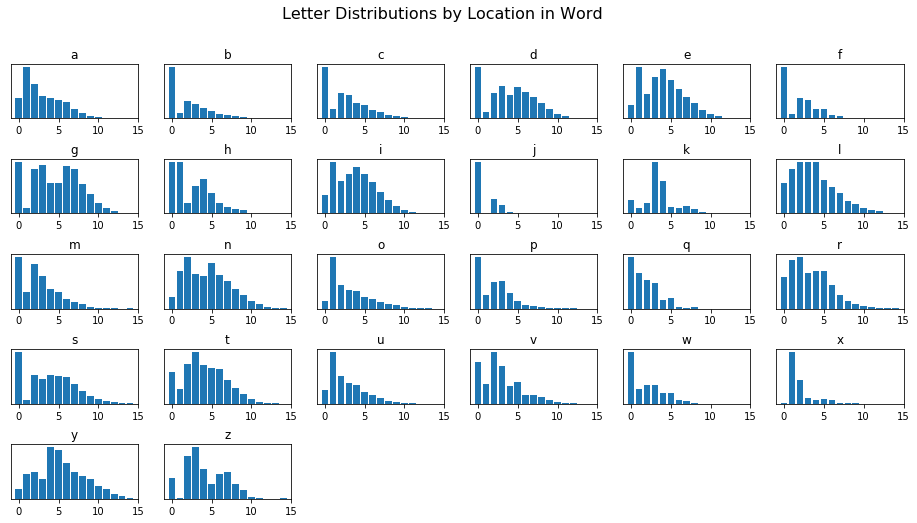

In [19]:
plot_letter_dists(normedDists)

------

## [/u/itsallcauchy](https://www.reddit.com/r/dataisbeautiful/comments/93owam/parsed_25322_of_the_most_common_english_words_to/e3et2zn/?utm_content=permalink&utm_medium=front&utm_source=reddit&utm_name=dataisbeautiful)

> Could you add an extra slot on the far right of each that denotes the last letter? I feel like that would be super helpful for letters like g. Or maybe color code the vertical bar graphs for the portion of each nth letter where it is also the last letter? Just a thought.

This should be done in two steps:

1. Adjustment to the `get_letter_dists` function that parses all of the text to get last letters
2. Some GroupBy operation that jointly plots the two together

### 1. Get Endings

The function as it works now just gets letters in whichever spot

In [3]:
dists = get_letter_dists(words, asFrame=True)
dists.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,1405.0,1566.0,2533.0,1595.0,988.0,1198.0,825.0,1036.0,915.0,250.0,...,92.0,1442.0,3135.0,1323.0,499.0,377.0,728.0,1.0,98.0,44.0
1,3554.0,150.0,438.0,202.0,3739.0,91.0,83.0,1040.0,2577.0,4.0,...,64.0,2227.0,220.0,624.0,1914.0,182.0,208.0,282.0,238.0,1.0
2,2368.0,518.0,1223.0,793.0,1784.0,460.0,703.0,205.0,1618.0,70.0,...,51.0,2364.0,1737.0,1645.0,1006.0,469.0,257.0,127.0,259.0,93.0
3,1506.0,442.0,1139.0,1007.0,3003.0,429.0,776.0,558.0,1937.0,39.0,...,46.0,1618.0,1473.0,2138.0,762.0,338.0,258.0,32.0,192.0,112.0
4,1371.0,317.0,729.0,702.0,3565.0,206.0,477.0,699.0,2296.0,7.0,...,15.0,1708.0,1706.0,1611.0,705.0,158.0,147.0,22.0,498.0,65.0


So we want to write a similar function that will only count where a letter is at the end of a word

In [4]:
def get_endings(corpus, asFrame=False):
    eachLetter = [chr(x+97) for x in range(26)]
    eachLetter = dict.fromkeys(eachLetter)
    
    for letter in eachLetter:
        eachLetter[letter] = {0:0}
        
    for word in corpus:
        lastIdx = len(word) - 1
        letter = word[lastIdx]
        eachLetter[letter][lastIdx] = eachLetter[letter].get(lastIdx, 0) + 1
            
    if asFrame:
        return pd.DataFrame(eachLetter).fillna(0)
    return eachLetter

Looks better

In [5]:
endings = get_endings(words, asFrame=True)
endings.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,4.0,9.0,2.0,1.0,5.0,8.0,0.0,...,0.0,3.0,5.0,3.0,2.0,0.0,2.0,3.0,4.0,0.0
2,21.0,32.0,12.0,46.0,61.0,5.0,46.0,17.0,12.0,1.0,...,0.0,30.0,37.0,65.0,3.0,2.0,28.0,24.0,45.0,4.0
3,59.0,33.0,10.0,125.0,310.0,37.0,56.0,61.0,12.0,1.0,...,0.0,58.0,306.0,200.0,12.0,1.0,37.0,9.0,95.0,14.0
4,83.0,10.0,26.0,222.0,390.0,25.0,39.0,131.0,9.0,0.0,...,0.0,197.0,801.0,216.0,2.0,0.0,13.0,7.0,392.0,7.0


Then we want a DataFrame that's everything *not* at the end of the letter

In [6]:
notEndings = (dists - endings).fillna(0)
notEndings.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,1405.0,1566.0,2533.0,1595.0,988.0,1198.0,825.0,1036.0,915.0,250.0,...,92.0,1442.0,3135.0,1323.0,499.0,377.0,728.0,1.0,98.0,44.0
1,3543.0,150.0,438.0,198.0,3730.0,89.0,82.0,1035.0,2569.0,4.0,...,64.0,2224.0,215.0,621.0,1912.0,182.0,206.0,279.0,234.0,1.0
2,2347.0,486.0,1211.0,747.0,1723.0,455.0,657.0,188.0,1606.0,69.0,...,51.0,2334.0,1700.0,1580.0,1003.0,467.0,229.0,103.0,214.0,89.0
3,1447.0,409.0,1129.0,882.0,2693.0,392.0,720.0,497.0,1925.0,38.0,...,46.0,1560.0,1167.0,1938.0,750.0,337.0,221.0,23.0,97.0,98.0
4,1288.0,307.0,703.0,480.0,3175.0,181.0,438.0,568.0,2287.0,7.0,...,15.0,1511.0,905.0,1395.0,703.0,158.0,134.0,15.0,106.0,58.0


And we'll roll them into one DataFrame

In [28]:
merged = endings.join(notEndings, lsuffix='_endings')

merged.head()

,a_endings,b_endings,c_endings,d_endings,e_endings,f_endings,g_endings,h_endings,i_endings,j_endings,...,q,r,s,t,u,v,w,x,y,z
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,92.0,1442.0,3135.0,1323.0,499.0,377.0,728.0,1.0,98.0,44.0
1,11.0,0.0,0.0,4.0,9.0,2.0,1.0,5.0,8.0,0.0,...,64.0,2224.0,215.0,621.0,1912.0,182.0,206.0,279.0,234.0,1.0
2,21.0,32.0,12.0,46.0,61.0,5.0,46.0,17.0,12.0,1.0,...,51.0,2334.0,1700.0,1580.0,1003.0,467.0,229.0,103.0,214.0,89.0
3,59.0,33.0,10.0,125.0,310.0,37.0,56.0,61.0,12.0,1.0,...,46.0,1560.0,1167.0,1938.0,750.0,337.0,221.0,23.0,97.0,98.0
4,83.0,10.0,26.0,222.0,390.0,25.0,39.0,131.0,9.0,0.0,...,15.0,1511.0,905.0,1395.0,703.0,158.0,134.0,15.0,106.0,58.0


### Make Plots

We'll probably want to make a `GroupBy` object. This lambda will group columns with the same starting letter

e.g. `a` and `a_endings`

In [29]:
gb = merged.groupby(lambda x: x[0], axis=1)

And modify our plotting function to stack the two, as well as our legend creator to demarcate orange vs blue

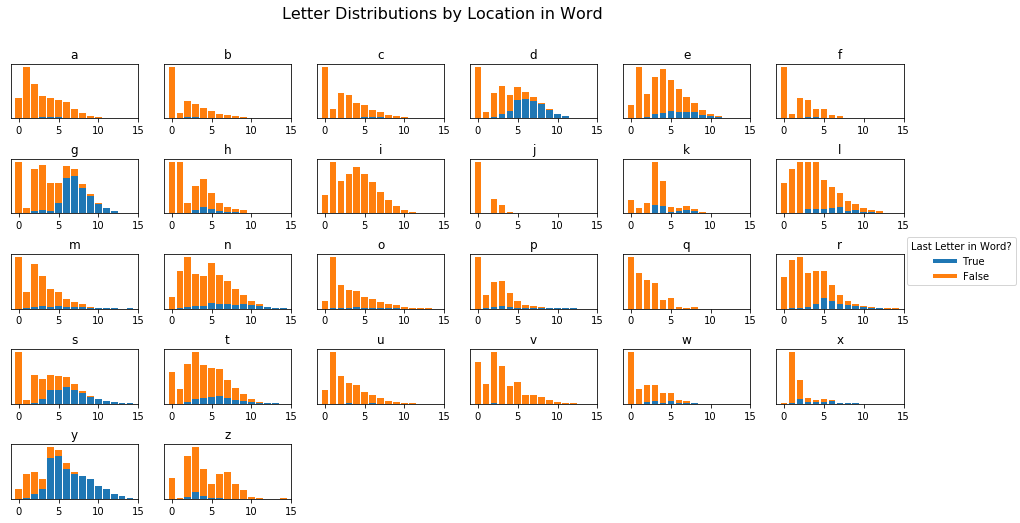

In [30]:
fig, axes = plt.subplots(5, 6, figsize=(16, 8))
for idx, (ax, group) in enumerate(zip(axes.flatten(), gb)):
    df = group[1]
    ax.bar(df.index, df.iloc[:, 0])
    ax.bar(df.index, df.iloc[:, 1], bottom=df.iloc[:, 0])
    ax.set_title(group[0])
    ax.set_xlim(-1, 15)
    ax.get_yaxis().set_visible(False)    
    
else:
    # clean up unused axes
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]
plt.subplots_adjust(hspace=.75)
plt.suptitle('Letter Distributions by Location in Word',
                   fontsize=16)    


custom_lines = [Line2D([0], [0], color='C0', lw=4),
                Line2D([0], [0], color='C1', lw=4),]
fig.legend(custom_lines, ['True', 'False'],
           title='Last Letter in Word?', loc='right')

In [ ]:
k